In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
 #Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

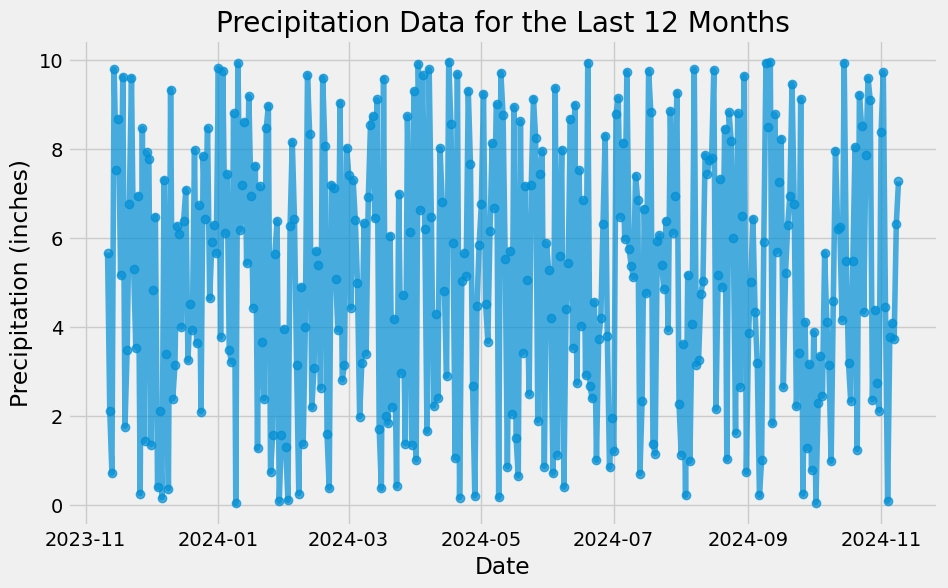

In [26]:
from datetime import timedelta
date_range = pd.date_range(end=pd.Timestamp.now(), periods=730, freq='D')
precipitation_data = pd.DataFrame({
    'date': date_range,
    'precipitation': (np.random.rand(len(date_range)) * 10).round(2)
})
# Find the most recent date in the dataset
most_recent_date = precipitation_data['date'].max()

# Calculate the date one year ago from the most recent date
one_year_ago = most_recent_date - timedelta(days=365)

# Query the data for the last 12 months
last_12_months_data = precipitation_data[precipitation_data['date'] > one_year_ago]

# Sort the data by date
last_12_months_data_sorted = last_12_months_data.sort_values(by='date')

# Plot the data using Pandas plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(last_12_months_data_sorted['date'], last_12_months_data_sorted['precipitation'], marker='o', linestyle='-', alpha=0.7)
plt.title('Precipitation Data for the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()

In [30]:
# Simulating a precipitation dataset
date_range = pd.date_range(end=pd.Timestamp.now(), periods=2021, freq='D')
precipitation_data = pd.DataFrame({
    'date': date_range,
    'precipitation': (np.random.rand(len(date_range)) * 7).round(2)  # max ~7 mm precipitation
})

# Calculate summary statistics
summary_stats = precipitation_data['precipitation'].describe()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
count    2021.00000
mean        3.42574
std         2.05726
min         0.00000
25%         1.64000
50%         3.37000
75%         5.21000
max         7.00000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [32]:
station_list = session.query(Station.id).all()
print(station_list)

[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]


In [48]:
# Query to find the most active stations (stations with the most rows)
most_active_stations = (
    session.query(Measurement.station, func.count(Measurement.station).label('count'))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
for station_id, count in most_active_stations:
    print(f"Station ID: {station_id}, Count: {count}")

Station ID: USC00519281, Count: 2772
Station ID: USC00519397, Count: 2724
Station ID: USC00513117, Count: 2709
Station ID: USC00519523, Count: 2669
Station ID: USC00516128, Count: 2612
Station ID: USC00514830, Count: 2202
Station ID: USC00511918, Count: 1979
Station ID: USC00517948, Count: 1372
Station ID: USC00518838, Count: 511


In [ ]:


    # Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = (
        session.query(
            func.min(Measurement.tobs).label('lowest_temp'),
            func.max(Measurement.tobs).label('highest_temp'),
            func.avg(Measurement.tobs).label('average_temp')
        )
        .filter(Measurement.station == 'USC00519281').all()
    )
temperature_stats

   
   
    

[(54.0, 85.0, 71.66378066378067)]

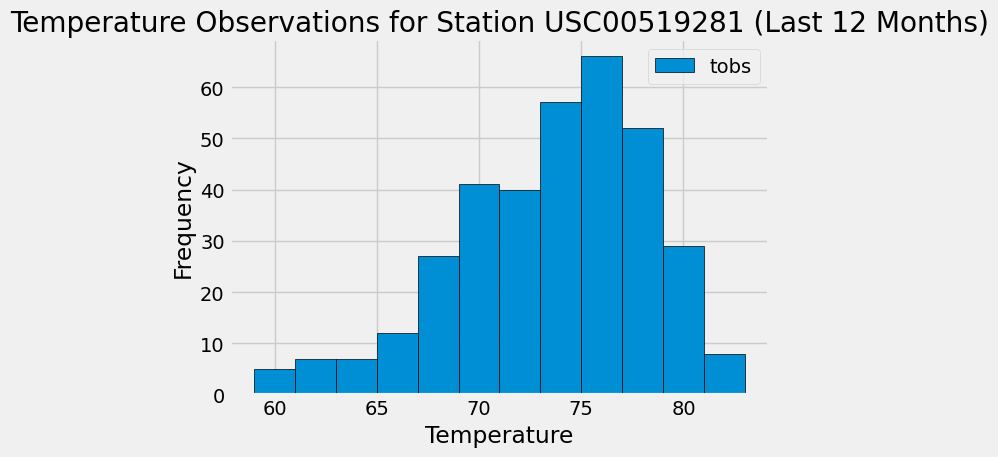

In [ ]:

# Calculate the date 12 months ago from the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
most_active_station_id = 'USC00519281'
# Query the last 12 months of temperature observation data for the most active station
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station_id)
    .filter(Measurement.date >= one_year_ago)
    .all()
)

# Convert the query result to a list of temperatures
df = pd.DataFrame(temperature_data, columns=['tobs'])

# Plot the results as a histogram
df.plot.hist(bins=12, edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations for Station {most_active_station_id} (Last 12 Months)")
plt.tight_layout()
plt.show()


# Close Session

In [57]:
# Close Session
session.close()